[View in Colaboratory](https://colab.research.google.com/github/marijusambrozas/JupyterWorkflow/blob/master/3ND_part2_MarijusAmbrozas.ipynb)

##Užduotis pagal:
###https://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/

###Bandymas padaryti vientisą kodą

####Failo pasiėmimas

`pydrive` reikės, kad būtų galima įkelti python failą iš google drive.

In [1]:
!pip install pydrive

Prijungiamas *Google Drive*

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Paimamas failas pagal bendrinamą nuorodą

In [0]:
my_module = drive.CreateFile({'id':'12hc52JLoKtWhbQW2SVOmURtFpqGrHWbY'})
my_module.GetContentFile('jupyterworkflow.py')

Galima importuoti

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from jupyterworkflow import get_fremont_data

Kodo dalis, kuri tapo `jupyterworkflow.py`

In [5]:
"""
import os
from urllib.request import urlretrieve
import pandas as pd

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL):
  if not os.path.exists(filename):
    urlretrieve(url, filename)
  data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
  data.columns = ['West', 'East']
  data['Total'] = data['West'] + data['East']
  return data
"""

"\nimport os\nfrom urllib.request import urlretrieve\nimport pandas as pd\n\nURL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'\n\ndef get_fremont_data(filename='Fremont.csv', url=URL):\n  if not os.path.exists(filename):\n    urlretrieve(url, filename)\n  data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)\n  data.columns = ['West', 'East']\n  data['Total'] = data['West'] + data['East']\n  return data\n"

In [6]:
data = get_fremont_data()
data.head()

West  East  Total
Date                                  
2012-10-03 00:00:00   9.0   4.0   13.0
2012-10-03 01:00:00   6.0   4.0   10.0
2012-10-03 02:00:00   1.0   1.0    2.0
2012-10-03 03:00:00   3.0   2.0    5.0
2012-10-03 04:00:00   1.0   6.0    7.0

Susumuosim po kiek pravažiuoja per savaitę

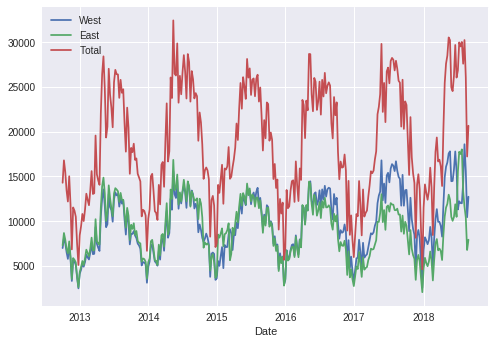

In [7]:
data.resample('W').sum().plot()

Norim pažiūrėti, ar yra kažkokių ilgalaikių tendencijų (per metus).

Kiekvienas grafiko taškas bus suma dviračių, pravažiavusių per praeitas 365 dienas.

(0, 1080850.45)

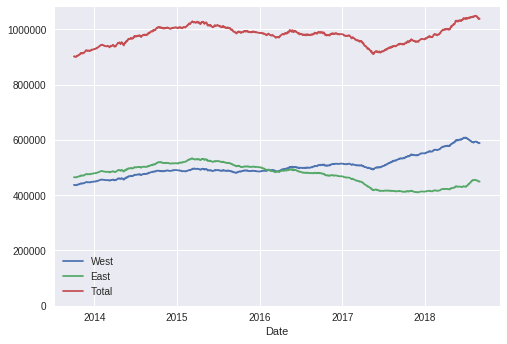

In [8]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

Skaičiuojam vidurkius kiekvienam paros laikui

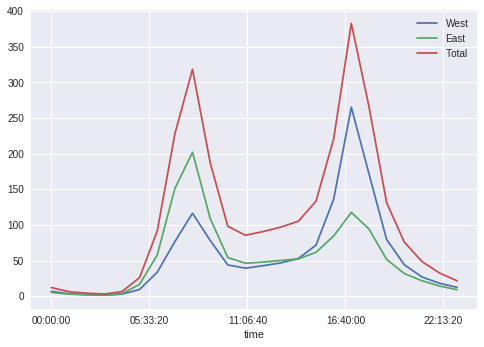

In [9]:
data.groupby(data.index.time).mean().plot()

Pertvarkom duomenis taip, kad rodytų srautus kiekvieną valandą padieniui

In [10]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

2012-10-03  2012-10-04  2012-10-05  2012-10-06  2012-10-07
00:00:00        13.0        18.0        11.0        15.0        11.0
01:00:00        10.0         3.0         8.0        15.0        17.0
02:00:00         2.0         9.0         7.0         9.0         3.0
03:00:00         5.0         3.0         4.0         3.0         6.0
04:00:00         7.0         8.0         9.0         5.0         3.0

Išbrėžiam kiekvienos dienos dviračių srautus skirtingomis valandomis

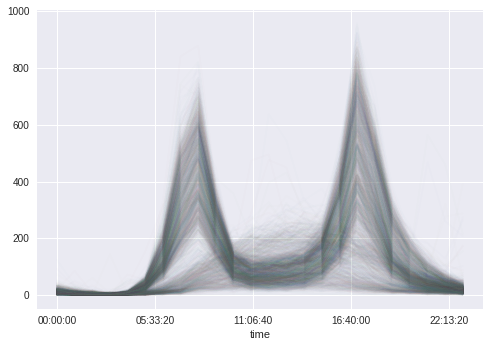

In [11]:
pivoted.plot(legend=False, alpha=0.01)

In [0]:
get_fremont_data??